In [236]:
#from pycaret.datasets import get_data
#from pycaret.classification import *
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Carregar o dataset Iris
data = pd.read_csv('sample_data/resource/Iris.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [237]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [238]:
data.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0



Data Shape:  (150, 6)


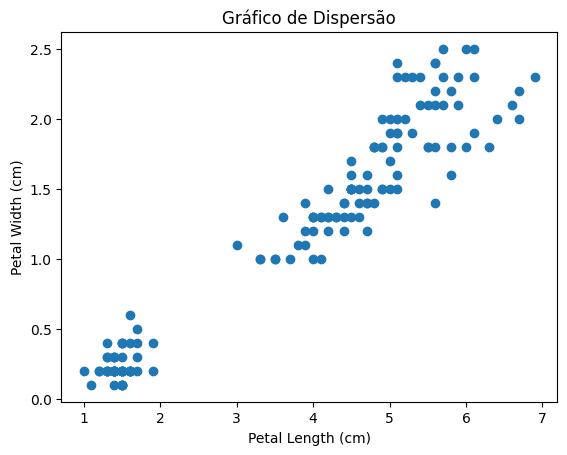

In [239]:
# Apresenta 150 Linhas e 6 Colunas
print("\nData Shape: ",data.shape)

# Comparação entre petal_length e petal_width
a = data['PetalLengthCm']
b = data['PetalWidthCm']
plt.scatter(a,b)
plt.ylabel("Petal Width (cm)")
plt.xlabel("Petal Length (cm)")
plt.title("Gráfico de Dispersão")
plt.show()

In [240]:
# Separação de atributos para treino e teste com o modelo KNN
X = data.drop('Species', axis=1)
y = data['Species']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pre = knn.predict(X_test)

In [241]:
y_test[100:105]

,Species
29,Iris-setosa
78,Iris-versicolor
34,Iris-setosa
18,Iris-setosa
118,Iris-virginica


In [242]:
pretest = knn.predict(X_test [100:105])
print(pretest)

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


In [243]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pre)
precision = precision_score(y_test, y_pre, average='weighted')
re = recall_score(y_test, y_pre, average='weighted')
f1Score = f1_score(y_test, y_pre, average='weighted')
print("Acurácia: ",acc,"\nPrecisão: ",precision,"\nRecall: ",re,"\nF1-Score: ",f1Score)

Acurácia:  0.9666666666666667 
Precisão:  0.9696969696969696 
Recall:  0.9666666666666667 
F1-Score:  0.9666666666666667
